# Init & parsing


In [1]:
from collections import Counter
from application import *
from pre_processing import Job, Systems, Objects 
import statistics
import numpy as np
import matplotlib.pyplot as plt
from journal import Journal, JournalASU, jobs_to_df
%matplotlib inline

# %load_ext autoreload
# %autoreload 2

In [2]:
jobs = []
jobs.extend(process_files(r'.\input data\SAKE', all_visible_sheets, works_parser.ParserSake))
# jobs.extend(process_files(r'.\input data\1', all_visible_sheets, works_parser.ParserSake)) # tests
# jobs.extend(process_files(r'.\input data\АСУ', find_sheets_asu, works_parser.ParserAsu))
# jobs.extend(process_files(r'.\input data\ВОЛС', all_visible_sheets, works_parser.ParserVols))
# jobs.extend(process_files(r'.\input data\Телеканал', find_sheets_vols, works_parser.ParserTk))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskueSake))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskue))
# jobs.extend(process_files(r'.\input data\Тех.учет', find_sheets_vols, works_parser.ParserTechReg))
print(len(jobs))

folder: .\input data\SAKE
542


In [3]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

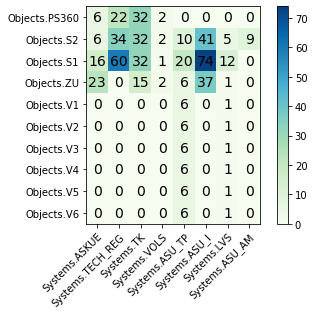

In [4]:
statistics.visualize_statistics(stats)

In [5]:

for (xlabel, ylabel), count in stats.items():
    print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

Systems.ASKUE    , Objects.PS360   - 6    
Systems.TECH_REG , Objects.PS360   - 22   
Systems.TK       , Objects.PS360   - 32   
Systems.VOLS     , Objects.PS360   - 2    
Systems.ASKUE    , Objects.S2      - 6    
Systems.TECH_REG , Objects.S2      - 34   
Systems.TK       , Objects.S2      - 32   
Systems.VOLS     , Objects.S2      - 2    
Systems.ASKUE    , Objects.S1      - 16   
Systems.TECH_REG , Objects.S1      - 60   
Systems.TK       , Objects.S1      - 32   
Systems.VOLS     , Objects.S1      - 1    
Systems.VOLS     , Objects.ZU      - 2    
Systems.ASU_TP   , Objects.V1      - 6    
Systems.ASU_TP   , Objects.V2      - 6    
Systems.ASU_TP   , Objects.S1      - 20   
Systems.ASU_TP   , Objects.ZU      - 6    
Systems.ASU_TP   , Objects.V3      - 6    
Systems.ASU_TP   , Objects.S2      - 10   
Systems.ASU_TP   , Objects.V4      - 6    
Systems.ASU_TP   , Objects.V5      - 6    
Systems.ASU_TP   , Objects.V6      - 6    
Systems.ASU_I    , Objects.S1      - 74   
Systems.ASU

# Tests

ASU test


In [6]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
# assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
# assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
# assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

all ASU/LVS tests is complete


VOLS test

In [7]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

all VOLS tests is complete


TK test

In [8]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

all TK tests is complete


ASKUE test

In [9]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

all ASKUE tests is complete


TECH_REG test

In [10]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0

print('all TECH_REG tests is complete')

all TECH_REG tests is complete


# Plans generator

In [11]:
make_xlsx_from_jobs(jobs)

Генерация планов работ 
 ...
Генерация успешно завершена


# Journals generator

In [3]:
from journal import Journal, JournalASU, JournalASKUE, jobs_to_df, batch_journal_generator
from config_journals import batch_ASU_journals, batch_ASKUE_journals


In [4]:
df_jobs = jobs_to_df(jobs)

In [5]:
batch_journal_generator(df_jobs, JournalASU, batch_ASU_journals)


{'АСУ ТП С1 Север': <journal.JournalASU at 0xd42a7f0>,
 'АСУ ТП С1 Юг': <journal.JournalASU at 0xc354630>,
 'АСУ ТП С2 Север': <journal.JournalASU at 0xd309510>,
 'АСУ ТП С2 Юг': <journal.JournalASU at 0xd2d8530>,
 'АСУ ТП В1': <journal.JournalASU at 0xd3762b0>,
 'АСУ ТП В2': <journal.JournalASU at 0xd377fb0>,
 'АСУ ТП В3': <journal.JournalASU at 0xd309670>,
 'АСУ ТП В4': <journal.JournalASU at 0xd373430>,
 'АСУ ТП В5': <journal.JournalASU at 0xd373e50>,
 'АСУ ТП В6': <journal.JournalASU at 0xd373390>,
 'АСУ ТП ЗУ': <journal.JournalASU at 0xd3dfc90>,
 'АСУ АМ С2': <journal.JournalASU at 0xd328cf0>,
 'АСУ И С1 Север': <journal.JournalASU at 0xd3c9470>,
 'АСУ И С1 Юг': <journal.JournalASU at 0xd30a7f0>,
 'АСУ И С2 Север': <journal.JournalASU at 0xd449870>,
 'АСУ И С2 Юг': <journal.JournalASU at 0xd42d5b0>,
 'АСУ И ЗУ': <journal.JournalASU at 0xd4449d0>,
 'АИИСКУЕ 2': <journal.JournalASU at 0xd3719f0>,
 'Тех Учет 2': <journal.JournalASU at 0xd3c90d0>,
 'ВОЛС': <journal.JournalASU at 0xc35

In [6]:
batch_journal_generator(df_jobs, JournalASKUE, batch_ASKUE_journals)

{'АИИСКУЕ': <journal.JournalASKUE at 0xd3947d0>,
 'Тех Учет': <journal.JournalASKUE at 0xd2d8ad0>,
 'ЛВС': <journal.JournalASKUE at 0xd387610>}

## email sending

In [1]:
import config_email, email_processing
import os
from application import get_xlsx_files


In [2]:
email_processing.send_journals(config_email.batch_sending_journals, 
                               attachment_folder=r'./output data/journals/', 
                               mail_subj='журналы работ', 
                               add_month_to_subj= True, test_mod=False)

Test mode: emails will not sending
email subject: журналы работ Август 
EKushmilev@bcc.ru    ['./output data/journals/2020 08 АСУ И С1 Север.xlsx', './output data/journals/2020 08 АСУ И С1 Юг.xlsx']
NMulin@bcc.ru        ['./output data/journals/2020 08 АСУ ТП С1 Север.xlsx', './output data/journals/2020 08 АСУ ТП С1 Юг.xlsx']
VMakarov@bcc.ru      ['./output data/journals/2020 08 АСУ АМ С2.xlsx', './output data/journals/2020 08 АСУ И ЗУ.xlsx', './output data/journals/2020 08 АСУ И С2 Север.xlsx', './output data/journals/2020 08 АСУ И С2 Юг.xlsx', './output data/journals/2020 08 АСУ ТП ЗУ.xlsx', './output data/journals/2020 08 АСУ ТП С2 Север.xlsx', './output data/journals/2020 08 АСУ ТП С2 Юг.xlsx']
MKokoev@bcc.ru       ['./output data/journals/2020 08 АСУ ТП В1.xlsx', './output data/journals/2020 08 АСУ ТП В2.xlsx', './output data/journals/2020 08 АСУ ТП В3.xlsx', './output data/journals/2020 08 АСУ ТП В4.xlsx', './output data/journals/2020 08 АСУ ТП В5.xlsx', './output data/journals/2

In [4]:
email_processing.send_journals(config_email.batch_sending_plans, 
                               attachment_folder=r'./output data/plans/', 
                               mail_subj='планы работ', 
                               add_month_to_subj= True, test_mod=False)


email subject: планы работ Август 
kzs.asu.504@gmail.com ['./output data/plans/2020 08 01.xlsx', './output data/plans/2020 08 02.xlsx', './output data/plans/2020 08 03.xlsx', './output data/plans/2020 08 04.xlsx', './output data/plans/2020 08 05.xlsx', './output data/plans/2020 08 06.xlsx', './output data/plans/2020 08 07.xlsx', './output data/plans/2020 08 08.xlsx', './output data/plans/2020 08 09.xlsx', './output data/plans/2020 08 10.xlsx', './output data/plans/2020 08 11.xlsx', './output data/plans/2020 08 12.xlsx', './output data/plans/2020 08 13.xlsx', './output data/plans/2020 08 14.xlsx', './output data/plans/2020 08 15.xlsx', './output data/plans/2020 08 16.xlsx', './output data/plans/2020 08 17.xlsx', './output data/plans/2020 08 18.xlsx', './output data/plans/2020 08 19.xlsx', './output data/plans/2020 08 20.xlsx', './output data/plans/2020 08 21.xlsx', './output data/plans/2020 08 22.xlsx', './output data/plans/2020 08 23.xlsx', './output data/plans/2020 08 24.xlsx', './out

# Sandbox